# **딥러닝 2 - Sequence**

## 1. RNN (Recurrent Neural Network)

순차 (sequence) 데이터 : 순서에 의미가 있으며, 순서가 달라질 경우 의미가 손상되는 데이터   
ex : 음성 및 오디오 데이터, 자연어, 생물학적 서열 데이터, 비디오 데이터
- 순차 데이터 : 가장 넓은 범위의 개념
- 시간적 순차 데이터 : 순차 데이터 중, 순서가 시간의 흐름을 나타낼 경우
- 시계열 데이터 : 시간적 순차 데이터에서 데이터가 일정한 시간 간격으로 기록되는 경우 -> 가장 구체적인 개념

기존 정형 데이터와의 차이점
- 요소의 순서 의존성 : 데이터를 구성하는 요소들의 순서 자체가 핵심 정보
- 자기상관성 : 이전 시점의 데이터가 다음 시점의 데이터에 영향을 미침

따라서 기존의 머신러닝 기법으로는 한계가 있음

### 1-1. RNN : 순환하는 구조를 가진 순차 데이터 처리에 특화된 인공 신경망 (순환 신경망)

1. 시퀀스 데이터를 입력받아 순서 정보를 유지하며 처리한다
2. 순환하는 은닉층이 매 시점의 은닉 상태를 업데이트한다
3. 이전 시점의 값을 현재 시점으로 넘겨준다

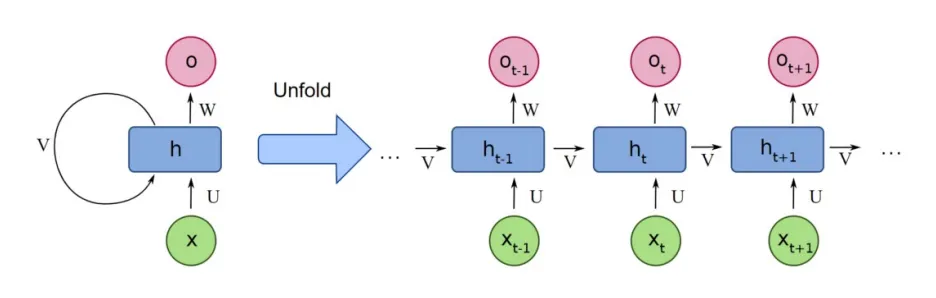

$x_t$: 시간 스텝 $ t$에서의 입력    
$h_t$: 시간 스텝 $ t$에서의 은닉 상태 (메모리)    
$o_t$: 시간 스텝 $ t$에서의 출력    
$U$(입력 가중치) : 현재 정보를 처리하는 역할     
$V$(순환 가중치) : 과거 정보를 다음 시점으로 전달하는 핵심 역할     
$W$(출력 가중치) : 계산된 메모리를 바탕으로 결과를 만들어내는 역할


정보 흐름
- $t−1 $ 시점: 입력 $x_{t-1}$이 들어가서 은닉 상태 $h_{t-1}$을 업데이트하고, 출력 $o_{t-1}$을 내보냄
- $t $ 시점: $ t−1 $시점에서 계산된 은닉 상태 $h_{t-1}$이 다음 시점으로 그대로 전달
- 새로운 입력 $xt$와 전달받은 과거 정보 $h_{t-1}$을 함께 사용하여 현재 시점의 은닉 상태 $ht$를 업데이트하고, 출력 $ot$를 계산

RNN의 핵심 원리 : 가중치 공유 (동일한 가중치를 시퀀스의 다양한 시점에서 반복적으로 적용)

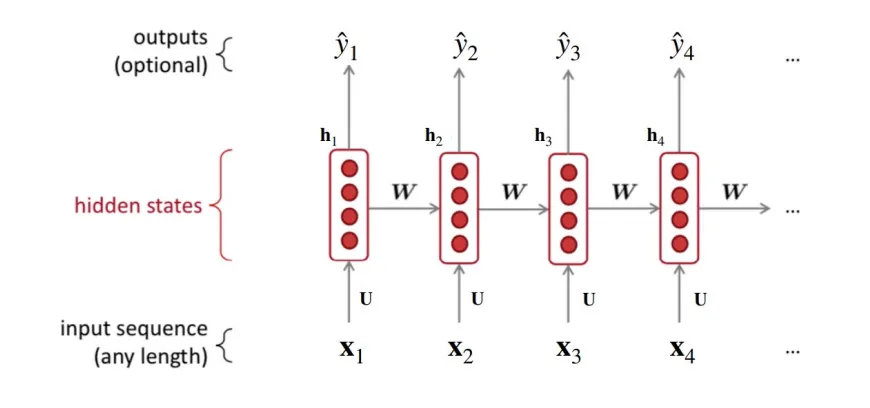

$X_1$을 처리할 때, $X_2$를 처리할 때, 그리고 $X_n$을 처리할 때까지 모두 동일한 파라미터(입력 가중치(U), 순환 가중치(W), 편향(b)) 를 공유하는 구조

가중치 공유의 이점
- 학습 파라미터의 수 감소
- 일반화 능력 향상
: 새로운 길이의 시퀀스나 다양한 패턴에도 유연하게 대응 가능

### 1-2. RNN의 한계 및 장기 의존성 문제

RNN 구조의 특성 상 전체 시퀀스를 모두 읽은 후에 역전파가 이루어짐

-> 역전파를 구하는 과정에서 chain rule에 의해 다음 미분값이 반복적으로 곱해짐


- 기울기 소실 : 시퀀스 뒤쪽의 오차가 앞쪽까지 제대로 전달되지 않아 먼 과거의 정보를 학습하지 못할 때 -> 기울기가 0으로 수렴
- 기울기 폭주 : 역전파 과정에서 기울기가 1보다 클 때 -> 기울기가 무한대로 발산
- 느린 훈련 시간 : 계산 과정이 순차적으로 이루어져야만 하는 구조적 한계로, 전체 시퀀스를 한 번에 병렬 처리 불가능

해당 세가지 문제는 '장기 의존성 문제' 라는 치명적인 약점으로 이어짐 

장기 의존성 문제 : 시퀀스 앞 부분의 중요한 정보를 잊어버려 맥락 파악 능력이 급격히 저하되는 현상

## 2. LSTM & GRU

### 2-1. LSTM

LSTM (Long Short Term Memory) : RNN의 기울기 소실 문제를 해결하기 위한 구조

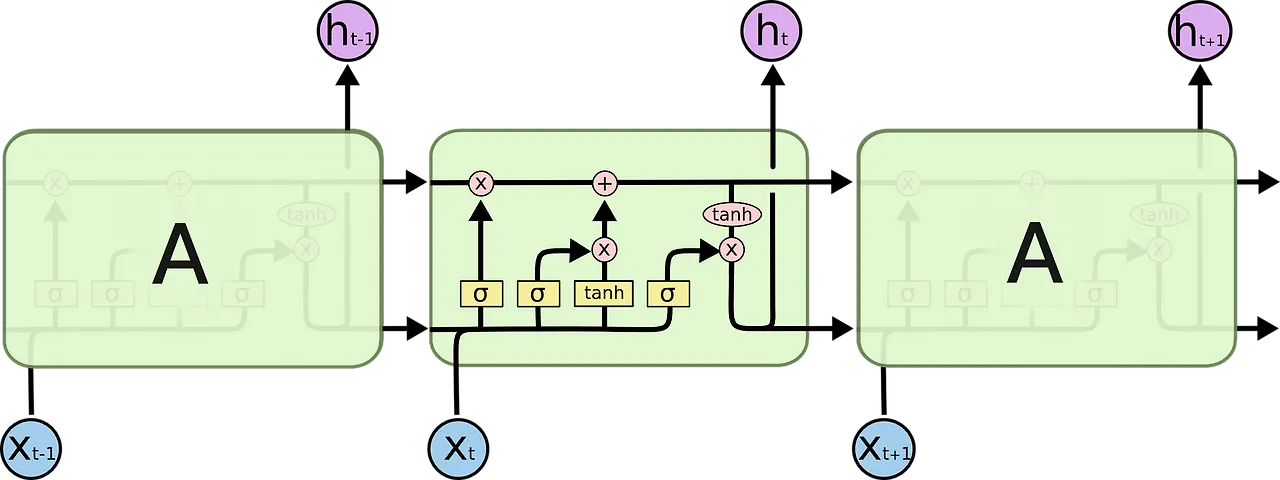

1. 핵심 아이디어 : 기억할 내용과 잊어버릴 내용을 선택해서, 중요한 정보들을 오래 가져간다. 
- GATE 를 통해 곱셈을 덧셈으로 바꾼다

2. RNN과의 주요 차이 : $c_t\text{와}\space h_t$의 2개의 순환되는 층을 사용한다.(RNN에서는 $h_t$ 1개)
- $c_t$(cell state): 장기 기억
- $h_t$(hidden state): 단기 기억

3. GATE 를 통해 필요한 정보들만 통과
- Forget gate : 정보를 얼마나 잊어버릴지 결정
- Input gate : 현재 정보를 얼마나 사용할지 결정
- Output gate : 다음 층으로 어떤 정보를 전달할지 결정

4. Final memory cell : Input, forget gate를 결합해 현재 정보를 얼마나 기억할지 계산


LSTM 장점 : Vanishing gradient problem 효과적으로 완화 (해결은 아님)

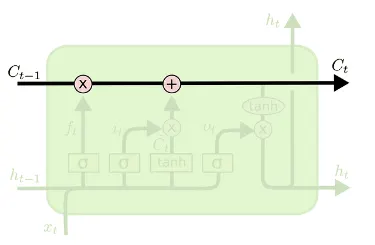

LSTM 단점 : 구조가 많이 복잡함, RNN보다 학습 파라미터가 많아짐

### 2-2. GRU (Gated Pecurrent Unit)

GRU : LSTM에서 조금 더 발전한 것으로 별도의 메모리 셀 없이 게이트 수를 줄여 구조를 간소화함

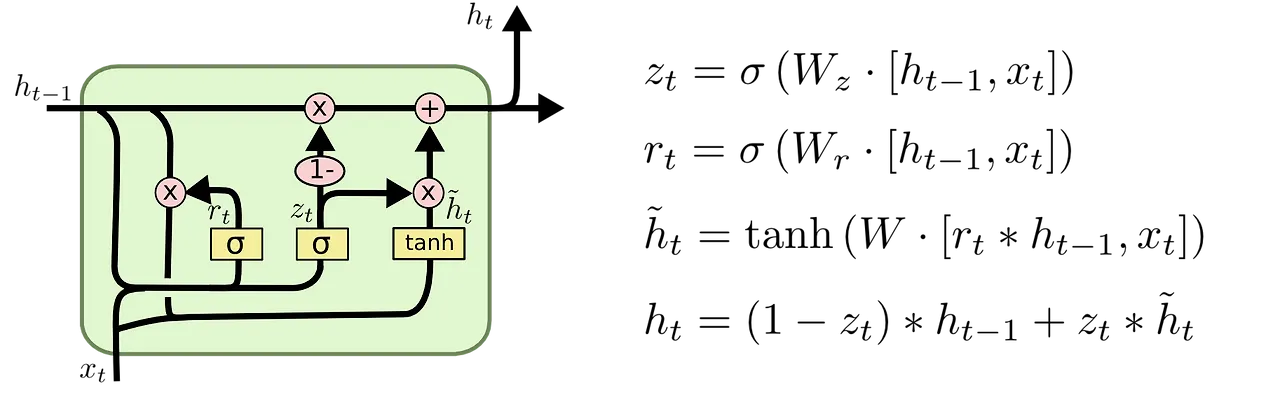

LSTM과의 차이점
- Forget gate와 input gate를 update gate 하나로 합침
- Reset gate를 사용
- Gate의 개수가 3개에서 2개로 줄어 학습 시간이 줄어듦 (성능은 유사하거나 더 좋음)

장점 : 성능과 효율성 사이의 균형이 좋음            
단점 : 긴 시퀀스 처리에서의 한계는 여전히 존재

### 2-3. LSTM vs GRU

- LSTM 적합한 경우
    - 긴 시퀀스에서 문맥 이해가 중요한 작업
    - 데이터 양이 충분하고 복잡한 패턴을 학습해야 하는 경우
    - 모델 성능이 계산 효율보다 더 중요한 경우
    - 기계 번역, 언어 모델링, 장기 시계열 예측

- GRU 적합한 경우
    - 자원이 제한적이거나 학습 속도가 중요한 경우
    - 데이터 양이 적고 과적합 위험이 있는 경우
    - 실시간 예측이 필요한 응용
    - 사용 예시: 음성 인식, 스트리밍 데이터, 실시간 비디오 분석, 짧은 시퀀스 기반의 텍스트 분류

## 3. Seq2Seq

### 3-1. 기본구조

Seq2Seq : 한 시퀀스를 다른 시퀀스로 변환하는 작업을 수행하는 딥러닝 모델 (기계번역에서 사용)

- 아이템(단어)의 입력 개수와 출력 개수가 같지 않아도 된다
- 인고커와 디코더라는 모듈을 가지고 있어 Encoder-Decoder 모델 이라고도 불린다

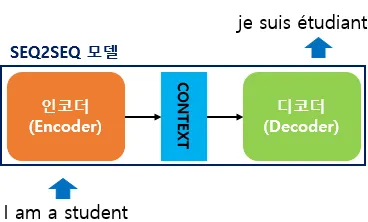

인코더 : 입력된 시퀀스를 읽고 압축하여 디코더에게 넘겨줄 문맥 정보 준비 (원문의 특징 파악)    
        여기서 압축된 정보는 컨텍스트 벡터라고 함

디코더 : 압축된 정보를 바탕으로 원하는 시퀀스를 생성     
기본적인 seq2seq에서는, 인코더가 보내준 컨텍스트 벡터는 디코더의 첫번째 은닉 상태에 사용됨

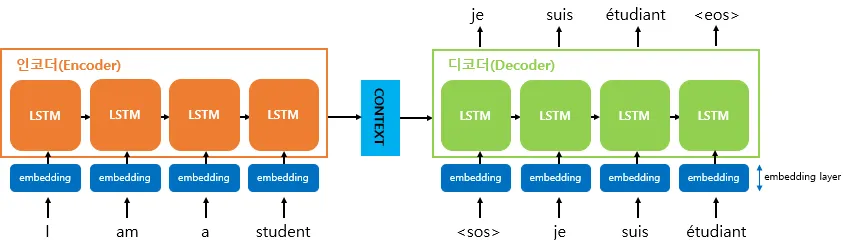

인코더와 디코더 모두 그림과 같이 RNN (LSTM/GRU)를 여러개 조합한 형태이다

컨텍스트 벡터 : float 형의 벡터 형태이며, 인코더 중 마지막 시점의 은닉 상태를 의미함. 입력 시퀀스의 요약 정보처럼 작동

### 3-2. Seq2Seq의 한계 : 병목 현상

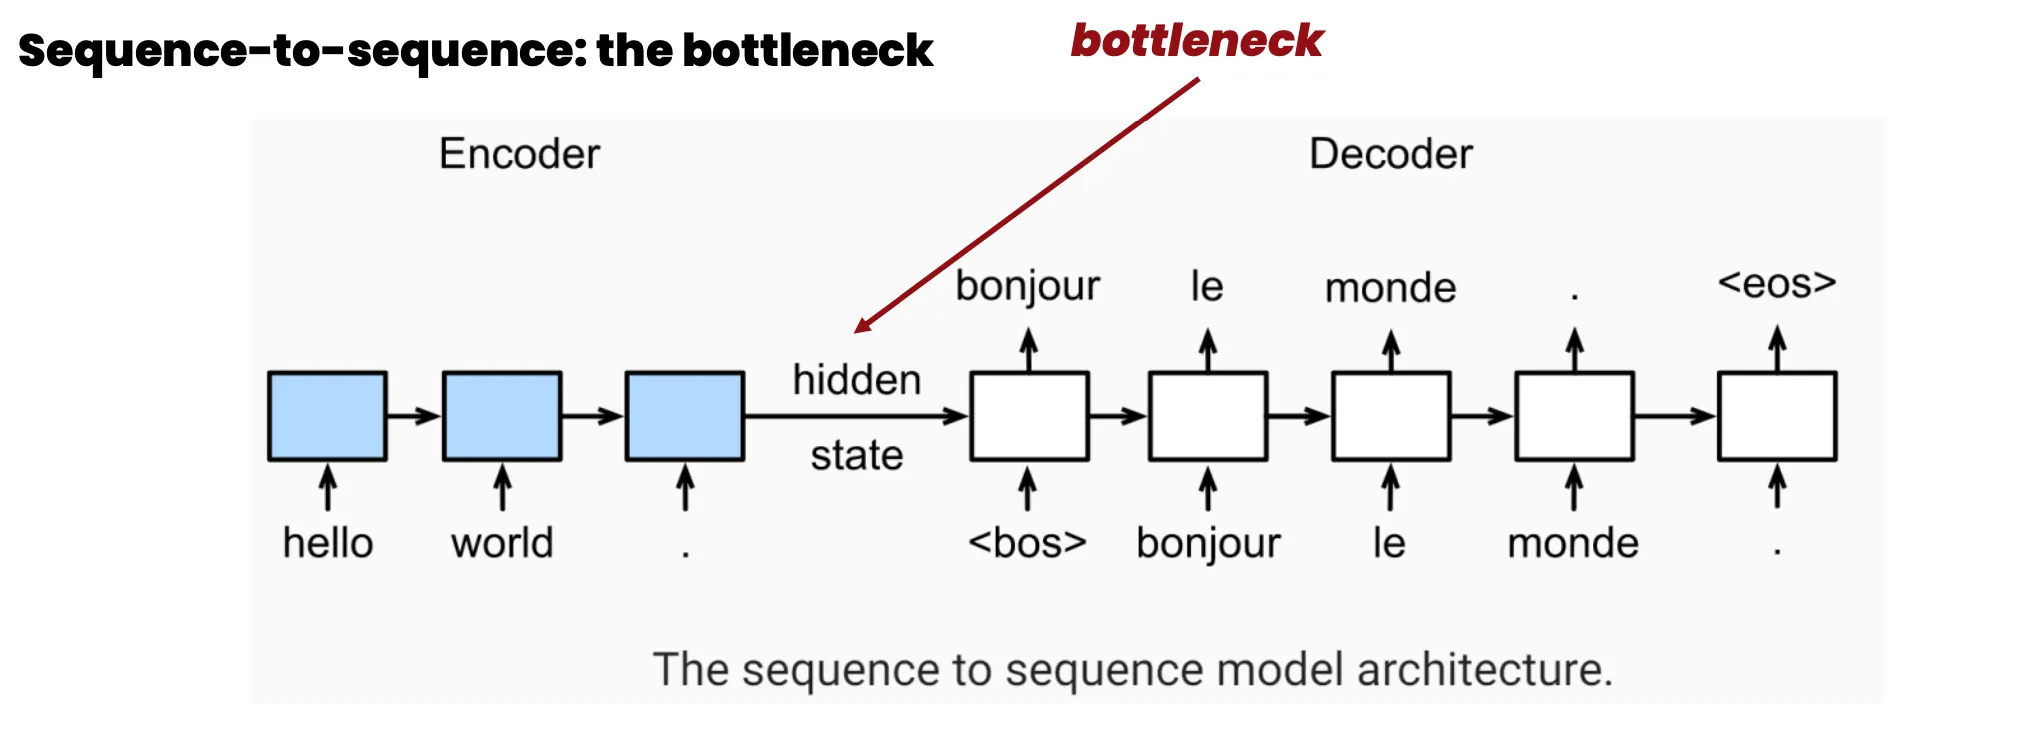

병목 현상 : 고정된 Context Vector에 소스 문장의 정보 압축할때 나타나는 현상
- 고정된 길이에 입력 시퀀스의 모든 정보를 담지 못하고 손실될 수 있음
- 특히 긴 입력 시퀀스의 경우 정보 손실이 더 심각 -> 모델 성능 하락
- 이런 한계를 해결하기 위해 Attention 매커니즘 도입